## IN4640 Assignment 1
### Intensity Transformations and Neighborhood Filtering
### Task 07

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
def zoom_image(image, s, interpolation='nearest'):
    h, w = image.shape[:2]
    new_h, new_w = int(h * s), int(w * s)
    
    if interpolation == 'nearest':
        zoomed_img = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_NEAREST)
    elif interpolation == 'bilinear':
        zoomed_img = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
    else:
        raise ValueError("Interpolation must be 'nearest' or 'bilinear'")
        
    return zoomed_img

def normalized_ssd(original, zoomed):
    if original.shape != zoomed.shape:
        return -1 
        
    diff = original.astype('float') - zoomed.astype('float')
    ssd = np.sum(diff ** 2)
    norm_ssd = ssd / (original.shape[0] * original.shape[1])
    if len(original.shape) == 3:
        norm_ssd /= original.shape[2]
    return norm_ssd

Image Pair: im01.png vs im01small.png
  Scale Factor: 4.00
  SSD (Nearest Neighbor): 136.2690
  SSD (Bilinear):         115.0919
------------------------------


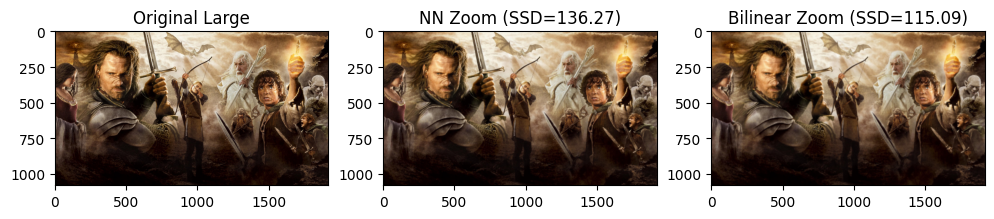

Image Pair: im02.png vs im02small.png
  Scale Factor: 4.00
  SSD (Nearest Neighbor): 26.4461
  SSD (Bilinear):         18.3459
------------------------------


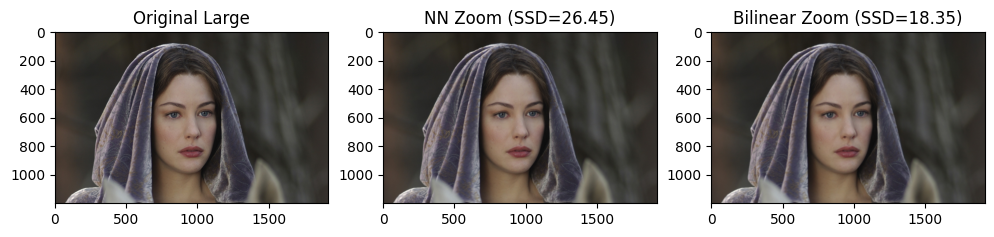

Image Pair: im03.png vs im03small.png
  Scale Factor: 4.00
  SSD (Nearest Neighbor): -1.0000
  SSD (Bilinear):         -1.0000
------------------------------


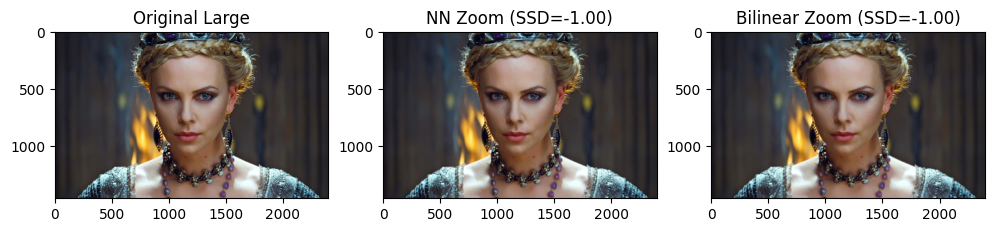

Image Pair: taylor.jpg vs taylor_small.jpg
  Scale Factor: 5.00
  SSD (Nearest Neighbor): 238.0281
  SSD (Bilinear):         222.9395
------------------------------


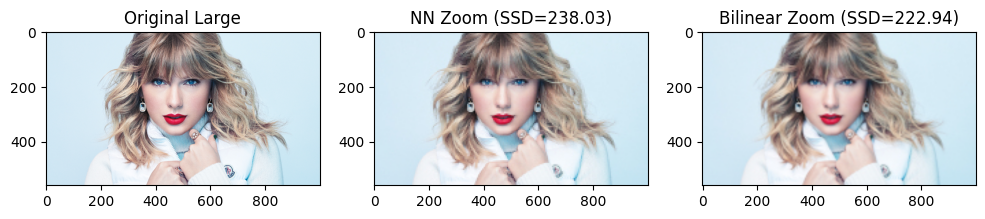

Image Pair: taylor.jpg vs taylor_very_small.jpg
  Scale Factor: 20.00
  SSD (Nearest Neighbor): 485.8905
  SSD (Bilinear):         450.4428
------------------------------


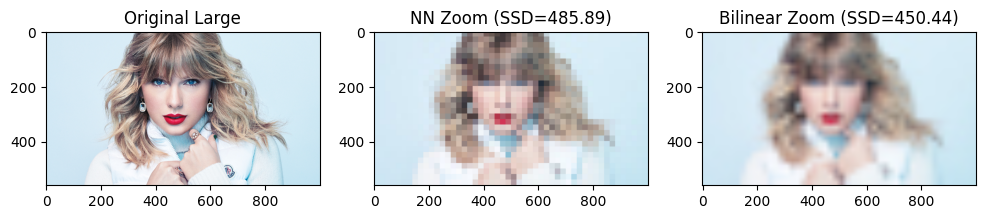

In [5]:
image_pairs = [
    ('im01.png', 'im01small.png'),
    ('im02.png', 'im02small.png'),
    ('im03.png', 'im03small.png'),
    ('taylor.jpg', 'taylor_small.jpg'),
    ('taylor.jpg', 'taylor_very_small.jpg')
]
base_path = 'assets/a1q7images/'

for big_name, small_name in image_pairs:
    big_path = os.path.join(base_path, big_name)
    small_path = os.path.join(base_path, small_name)
    
    if os.path.exists(big_path) and os.path.exists(small_path):
        img_big = cv2.imread(big_path)
        img_small = cv2.imread(small_path)
        
        scale_factor = img_big.shape[0] / img_small.shape[0]
        
        img_nn = zoom_image(img_small, scale_factor, 'nearest')
        ssd_nn = normalized_ssd(img_big, img_nn)
        
        img_bilinear = zoom_image(img_small, scale_factor, 'bilinear')
        ssd_bilinear = normalized_ssd(img_big, img_bilinear)
        
        print(f"Image Pair: {big_name} vs {small_name}")
        print(f"  Scale Factor: {scale_factor:.2f}")
        print(f"  SSD (Nearest Neighbor): {ssd_nn:.4f}")
        print(f"  SSD (Bilinear):         {ssd_bilinear:.4f}")
        print("-" * 30)
        
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1); plt.imshow(cv2.cvtColor(img_big, cv2.COLOR_BGR2RGB)); plt.title('Original Large')
        plt.subplot(1, 3, 2); plt.imshow(cv2.cvtColor(img_nn, cv2.COLOR_BGR2RGB)); plt.title(f'NN Zoom (SSD={ssd_nn:.2f})')
        plt.subplot(1, 3, 3); plt.imshow(cv2.cvtColor(img_bilinear, cv2.COLOR_BGR2RGB)); plt.title(f'Bilinear Zoom (SSD={ssd_bilinear:.2f})')
        plt.show()
        
    else:
        print(f"Error: Missing files for pair {big_name}, {small_name}")